In [1]:
import logging as logger
import os
import shutil
import tarfile
from csv import reader
import logging as logger
import os
import shutil
import tarfile
from csv import reader

import cv2
import pandas as pd
import seaborn as sns

In [2]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
from seaborn import set_style

## This sets the plot style
## to have a grid on a dark background
set_style("whitegrid")

In [3]:
from usefunc import findangamp,findang
from usefunc import mostvalue, possibleaction,findpacman
from usefunc import pickaction
from usefunc import accuracy

# Data training and predictions

In [4]:
finaldf=pd.read_csv('finaldf.csv')
finaldf

,frame_id,action,gaze_variance0,gaze_variance1,ghost_amp,ghost_angle,mean_angle,mean_amplitude,start_angle,start_amplitude,end_angle,end_amplitude,com_angle0,com_angle1,0,1,2,3
0,RZ_5037271_4,0,0.035883,0.003952,44.150837,79.934677,-107.945729,13.799091,-107.185325,14.126018,-108.034756,13.771982,-72.986692,-162.986692,1,0,1,1
1,RZ_5037271_5,0,0.029144,0.004015,43.987088,81.217296,-108.305842,13.905737,-108.019981,13.718247,-108.533426,13.948754,-97.508199,-7.508199,1,0,1,1
2,RZ_5037271_6,0,0.070980,0.008503,46.737023,81.776845,-113.643011,11.329768,-112.825956,11.381482,-114.635915,11.287626,97.549158,7.549158,1,1,1,1
3,RZ_5037271_7,0,0.047391,0.008704,46.604505,82.993701,-112.911807,11.766484,-114.404793,11.266875,-112.830973,11.946105,95.946701,-174.053299,1,1,1,1
4,RZ_5037271_8,0,0.054097,0.008667,48.590183,83.281367,-118.595054,9.801289,-117.223417,10.132558,-118.731446,9.705029,-83.923473,-173.923473,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14831,RZ_5037271_17306,2,1.469895,0.012684,110.304549,118.971830,114.338379,170.906662,114.227716,173.210204,114.409012,169.460775,107.107439,17.107439,0,1,1,0
14832,RZ_5037271_17307,2,0.355787,0.007117,4.371057,174.801436,114.535687,168.796607,114.426354,169.396198,114.754752,167.693789,-90.909502,179.090498,0,1,1,0
14833,RZ_5037271_17308,2,121.790149,0.890204,8.807570,30.731556,111.307934,194.162089,114.669279,168.382020,110.389077,199.140620,-91.365272,178.634728,0,1,1,0
14834,RZ_5037271_17309,2,0.362737,0.011814,110.207812,118.880865,110.525212,198.067893,110.404123,199.000024,110.641052,197.352773,84.028416,-5.971584,0,1,1,0


## train_test_split

In [5]:
X = finaldf.drop(['action'],axis=1).copy()
y = finaldf['action']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                       shuffle=True,
                                                       random_state=435,
                                                       test_size=.2,
                                                       stratify=y)

In [6]:
test_data=pd.concat([X_test,y_test],axis=1)
test_data.to_csv('test_data.csv',index=False)

In [7]:
X_train=X_train.drop(['frame_id'],axis=1).copy().values
X_test=X_test.drop(['frame_id'],axis=1).copy().values
y_train=y_train.values
y_test=y_test.values

## normal logistic regression

In [13]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs', max_iter=10000)

## fit the model
log_reg.fit(X_train, y_train)
#log_reg.fit(X_train.reshape(-1,1), y_train)

LogisticRegression(max_iter=10000)

In [14]:
log_reg.predict(X_train)
print("Training Accuracy:", accuracy(y_train, log_reg.predict(X_train)))

Training Accuracy: 0.482979440512302


In [15]:
log_reg.predict(X_test)
print("Testing Accuracy:", accuracy(y_test, log_reg.predict(X_test)))

Testing Accuracy: 0.4868598382749326


In [16]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, log_reg.predict(X_test))
pd.DataFrame(conf_mat,
                 columns = ['Predicted 0', 'Predicted 1', 'Predicted 2','Predicted 3'],
                 index = ['Actual 0', 'Actual 1', 'Actual 2','Actual 3'])

,Predicted 0,Predicted 1,Predicted 2,Predicted 3
Actual 0,426,6,69,159
Actual 1,165,62,425,91
Actual 2,140,60,562,175
Actual 3,128,2,103,395


## multi-layer in sklearn

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [19]:
from sklearn.neural_network import MLPClassifier

In [20]:
mlp1 = MLPClassifier(hidden_layer_sizes=(100,100,100,100), max_iter=5000)

In [21]:
mlp1.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100), max_iter=5000)

In [22]:
def accuracy(true, predicted):
    return np.sum(true==predicted)/len(predicted)
print("Training Accuracy:", accuracy(y_train, mlp1.predict(X_train)))
print("Testing Accuracy:", accuracy(y_test, mlp1.predict(X_test)))

Training Accuracy: 0.9477586788001349
Testing Accuracy: 0.7328167115902965


In [23]:
mlp1.predict(X_train)

array([0, 3, 1, ..., 3, 3, 3], dtype=int64)

In [24]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_train, mlp1.predict(X_train))
pd.DataFrame(conf_mat,
                 columns = ['Predicted 0', 'Predicted 1', 'Predicted 2','Predicted 3'],
                 index = ['Actual 0', 'Actual 1', 'Actual 2','Actual 3'])

,Predicted 0,Predicted 1,Predicted 2,Predicted 3
Actual 0,2493,32,68,44
Actual 1,33,2829,53,57
Actual 2,74,68,3523,82
Actual 3,20,49,40,2403


In [25]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, mlp1.predict(X_test))
pd.DataFrame(conf_mat,
                 columns = ['Predicted 0', 'Predicted 1', 'Predicted 2','Predicted 3'],
                 index = ['Actual 0', 'Actual 1', 'Actual 2','Actual 3'])

,Predicted 0,Predicted 1,Predicted 2,Predicted 3
Actual 0,458,56,80,66
Actual 1,49,553,87,54
Actual 2,70,87,705,75
Actual 3,57,48,64,459


## multilayer using keras

In [8]:
import keras

In [9]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.utils.np_utils import to_categorical

In [10]:
md = models.Sequential()

In [11]:
md.add(layers.Dense(100, activation = 'relu',input_shape=(16,)))
md.add(layers.Dense(100, activation = 'relu'))
md.add(layers.Dense(100, activation = 'relu'))
md.add(layers.Dense(100, activation = 'relu'))
md.add(layers.Dense(4, activation = 'softmax'))

In [12]:
md.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1700      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 4)                 404       
                                                                 
Total params: 32,404
Trainable params: 32,404
Non-trainable params: 0
_________________________________________________________________


In [13]:
md.compile(optimizer='rmsprop', 
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [14]:
from sklearn.model_selection import train_test_split

X_train_train,X_val,y_train_train,y_val = train_test_split(X_train, y_train,
                                                          test_size=.2,
                                                          shuffle=True,
                                                          stratify=y_train,
                                                          random_state=440)

In [15]:
X_val.shape

(2374, 16)

In [16]:
n_epochs = 100
batch_size = 512



history = md.fit(X_train_train, to_categorical(y_train_train),
                       epochs = n_epochs,
                       batch_size = batch_size,
                       validation_data = (X_val, to_categorical(y_val)))

Epoch 1/100
19/19 [==============================] - 1s 22ms/step - loss: 3.6973 - accuracy: 0.3414 - val_loss: 1.8668 - val_accuracy: 0.3669
Epoch 2/100
19/19 [==============================] - 0s 8ms/step - loss: 1.7010 - accuracy: 0.3937 - val_loss: 1.7331 - val_accuracy: 0.4086
Epoch 3/100
19/19 [==============================] - 0s 8ms/step - loss: 1.4970 - accuracy: 0.4262 - val_loss: 1.7185 - val_accuracy: 0.4086
Epoch 4/100
19/19 [==============================] - 0s 7ms/step - loss: 1.3494 - accuracy: 0.4557 - val_loss: 1.3849 - val_accuracy: 0.4490
Epoch 5/100
19/19 [==============================] - 0s 7ms/step - loss: 1.3258 - accuracy: 0.4586 - val_loss: 1.3394 - val_accuracy: 0.4621
Epoch 6/100
19/19 [==============================] - 0s 7ms/step - loss: 1.2324 - accuracy: 0.4726 - val_loss: 1.3679 - val_accuracy: 0.4431
Epoch 7/100
19/19 [==============================] - 0s 8ms/step - loss: 1.1954 - accuracy: 0.4901 - val_loss: 1.2691 - val_accuracy: 0.4541
Epoch 8/100


Epoch 59/100
19/19 [==============================] - 0s 7ms/step - loss: 0.7388 - accuracy: 0.6959 - val_loss: 1.3015 - val_accuracy: 0.5177
Epoch 60/100
19/19 [==============================] - 0s 8ms/step - loss: 0.7151 - accuracy: 0.7132 - val_loss: 1.2545 - val_accuracy: 0.5493
Epoch 61/100
19/19 [==============================] - 0s 11ms/step - loss: 0.7241 - accuracy: 0.7040 - val_loss: 1.3068 - val_accuracy: 0.5202
Epoch 62/100
19/19 [==============================] - 0s 9ms/step - loss: 0.7122 - accuracy: 0.7083 - val_loss: 1.2351 - val_accuracy: 0.5316
Epoch 63/100
19/19 [==============================] - 0s 10ms/step - loss: 0.7206 - accuracy: 0.7023 - val_loss: 1.2226 - val_accuracy: 0.5447
Epoch 64/100
19/19 [==============================] - 0s 10ms/step - loss: 0.6937 - accuracy: 0.7219 - val_loss: 1.3158 - val_accuracy: 0.5194
Epoch 65/100
19/19 [==============================] - 0s 8ms/step - loss: 0.7172 - accuracy: 0.7030 - val_loss: 1.2760 - val_accuracy: 0.5295
Epo

In [17]:
history_dict = history.history

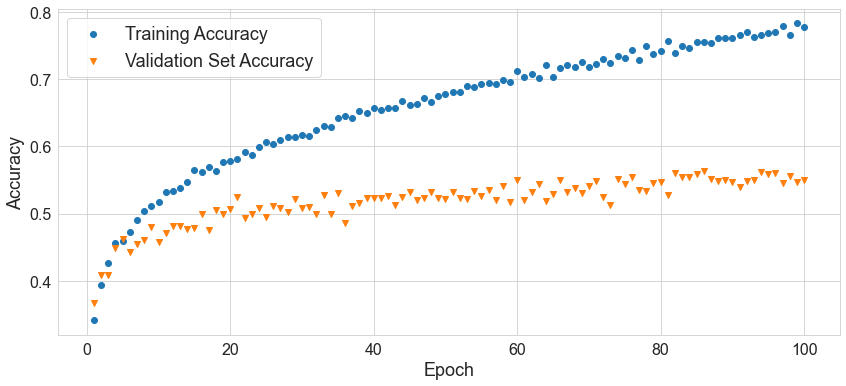

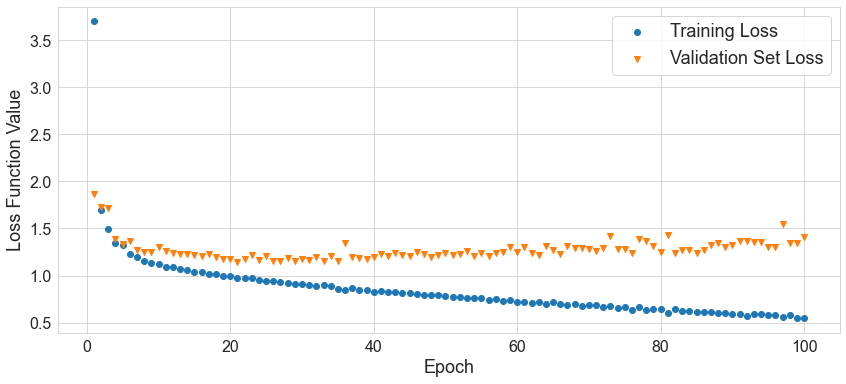

In [18]:
plt.figure(figsize = (14,6))

plt.scatter(range(1,n_epochs+1), history_dict['accuracy'], label = "Training Accuracy")
plt.scatter(range(1,n_epochs+1), history_dict['val_accuracy'], marker='v', label = "Validation Set Accuracy")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=18)

plt.show()


plt.figure(figsize = (14,6))

plt.scatter(range(1,n_epochs+1), history_dict['loss'], label = "Training Loss")
plt.scatter(range(1,n_epochs+1), history_dict['val_loss'], marker='v', label = "Validation Set Loss")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Loss Function Value", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=18)

plt.show()

In [19]:
pred=np.argmax(md.predict(X_train), axis=1)
pred

371/371 [==============================] - 1s 1ms/step


array([0, 0, 1, ..., 3, 3, 3], dtype=int64)

In [20]:
from sklearn.metrics import accuracy_score
print('Testing accuracy:',np.round(100*accuracy_score(y_test, np.argmax(md.predict(X_test), axis=1)),2))
print('Training accuracy:',np.round(100*accuracy_score(y_train, np.argmax(md.predict(X_train), axis=1)),2))

93/93 [==============================] - 0s 1ms/step
Testing accuracy: 54.68
371/371 [==============================] - 0s 1ms/step
Training accuracy: 72.71


In [21]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_train,np.argmax(md.predict(X_train), axis=1))
pd.DataFrame(conf_mat,
                 columns = ['Predicted 0', 'Predicted 1', 'Predicted 2','Predicted 3'],
                 index = ['Actual 0', 'Actual 1', 'Actual 2','Actual 3'])

371/371 [==============================] - 0s 1ms/step


,Predicted 0,Predicted 1,Predicted 2,Predicted 3
Actual 0,1607,266,663,101
Actual 1,149,2360,364,99
Actual 2,125,325,3172,125
Actual 3,126,464,432,1490


In [22]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,np.argmax(md.predict(X_test), axis=1))
pd.DataFrame(conf_mat,
                 columns = ['Predicted 0', 'Predicted 1', 'Predicted 2','Predicted 3'],
                 index = ['Actual 0', 'Actual 1', 'Actual 2','Actual 3'])

93/93 [==============================] - 0s 1ms/step


,Predicted 0,Predicted 1,Predicted 2,Predicted 3
Actual 0,272,116,236,36
Actual 1,89,447,150,57
Actual 2,81,123,658,75
Actual 3,54,172,156,246
